# Load the libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Load the data

In [2]:

df = pd.read_excel("Momos-Data-Case-Study-Data-Set.xlsx")

# Understandin the data

In [3]:
df.head()

,transaction_date,brand_name,outlet_name,channel,ad_spend,transaction_hour,order_type,total_orders,total_completed_orders,total_sales,total_promo_orders,total_promo_sales,total_non_promo_orders,total_non_promo_sales,platform_promo_spend,clicks,impressions,reach
0,2020-01-01,Pizzeria,Pizzeria - Central,Platform A,0.00,17.0,DELIVERY,1.0,1.0,42.80,0.0,0.0,1.0,42.80,0.0,NaN,NaN,NaN
1,2020-01-01,Pizzeria,Pizzeria - Central,Platform A,0.00,20.0,DELIVERY,1.0,1.0,48.15,0.0,0.0,1.0,48.15,0.0,NaN,NaN,NaN
2,2020-01-01,Pizzeria,Pizzeria - Central,Facebook,16.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,2377.0,1797.0
3,2020-01-01,Pizzeria,Pizzeria - Central,Facebook,17.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1124.0,575.0
4,2020-01-01,Pizzeria,Pizzeria - Central,Facebook,17.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,4477.0,4088.0


In [4]:
df.shape

(10511, 18)

In [5]:
df.dtypes

transaction_date           object
brand_name                 object
outlet_name                object
channel                    object
ad_spend                  float64
transaction_hour          float64
order_type                 object
total_orders              float64
total_completed_orders    float64
total_sales               float64
total_promo_orders        float64
total_promo_sales         float64
total_non_promo_orders    float64
total_non_promo_sales     float64
platform_promo_spend      float64
clicks                    float64
impressions               float64
reach                     float64
dtype: object

In [6]:
# Convert the date to date format

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10511 entries, 0 to 10510
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_date        10511 non-null  datetime64[ns]
 1   brand_name              10511 non-null  object        
 2   outlet_name             10457 non-null  object        
 3   channel                 10511 non-null  object        
 4   ad_spend                10289 non-null  float64       
 5   transaction_hour        6756 non-null   float64       
 6   order_type              6756 non-null   object        
 7   total_orders            6756 non-null   float64       
 8   total_completed_orders  6756 non-null   float64       
 9   total_sales             6756 non-null   float64       
 10  total_promo_orders      6756 non-null   float64       
 11  total_promo_sales       6756 non-null   float64       
 12  total_non_promo_orders  6756 non-null   float6

In [8]:
df.describe()

,ad_spend,transaction_hour,total_orders,total_completed_orders,total_sales,total_promo_orders,total_promo_sales,total_non_promo_orders,total_non_promo_sales,platform_promo_spend,clicks,impressions,reach
count,10289.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,6756.000000,3755.000000,3755.000000,3755.000000
mean,2.695993,16.021906,1.884103,1.822084,87.349984,0.243191,19.874486,1.578893,67.475497,3.378196,24.459121,1853.445273,1747.862051
std,4.987162,3.441996,1.528522,1.520749,99.179393,0.728548,64.163723,1.405864,79.115875,12.063352,32.859748,2059.752492,1971.799884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,13.000000,1.000000,1.000000,29.960000,0.000000,0.000000,1.000000,22.470000,0.000000,6.000000,591.000000,532.000000
50%,0.000000,17.000000,1.000000,1.000000,56.710000,0.000000,0.000000,1.000000,43.870000,0.000000,15.000000,1177.000000,1122.000000
75%,4.080000,19.000000,2.000000,2.000000,108.600000,0.000000,0.000000,2.000000,85.600000,0.000000,30.000000,2249.000000,2116.500000
max,54.180000,23.000000,14.000000,14.000000,1047.580000,13.000000,894.560000,14.000000,1020.290000,202.230000,551.000000,17627.000000,17627.000000


In [9]:
df.isnull().sum()

transaction_date             0
brand_name                   0
outlet_name                 54
channel                      0
ad_spend                   222
transaction_hour          3755
order_type                3755
total_orders              3755
total_completed_orders    3755
total_sales               3755
total_promo_orders        3755
total_promo_sales         3755
total_non_promo_orders    3755
total_non_promo_sales     3755
platform_promo_spend      3755
clicks                    6756
impressions               6756
reach                     6756
dtype: int64

# Clean, modify..

In [10]:
# add field "month" to idenity the month of transaction date

df.insert(1, "month", df['transaction_date'].dt.strftime('%m'))

In [11]:
col_zeros = ["ad_spend","total_orders","total_completed_orders","total_sales",
             "total_promo_orders","total_promo_sales","total_non_promo_orders",
             "total_non_promo_sales","platform_promo_spend","clicks" ]
print(col_zeros)

['ad_spend', 'total_orders', 'total_completed_orders', 'total_sales', 'total_promo_orders', 'total_promo_sales', 'total_non_promo_orders', 'total_non_promo_sales', 'platform_promo_spend', 'clicks']


In [12]:
df2 = df.groupby(['month','brand_name'])['platform_promo_spend'].agg("sum")
print(df2)

month  brand_name      
01     Louvré                 0.00
       Pizzeria              15.90
       The Beach              0.00
       The Brunch Place       0.00
02     Louvré                 0.00
       Pizzeria             374.25
       The Beach              0.00
       The Brunch Place       0.00
03     Louvré                 0.00
       Pizzeria              75.22
       The Beach              0.00
       The Brunch Place       0.00
04     Louvré                 0.00
       Pizzeria             133.27
       The Beach              0.00
       The Brunch Place       0.00
05     Louvré                 0.00
       Pizzeria               4.35
       The Beach              0.00
       The Brunch Place       0.00
06     Louvré                 0.00
       Pizzeria               0.00
       The Beach              0.00
       The Brunch Place       0.00
07     Club Street            0.00
       Louvré                 0.00
       Pizzeria            2467.59
       The Beach              0

# What is the average monthly promo and ad spend per brand and channel?

In [13]:
avg_monthly = df.groupby(['brand_name','channel']).aggregate({'platform_promo_spend' :'sum','ad_spend':'sum'})/12
avg_monthly

platform_promo_spend     ad_spend
brand_name       channel                                      
Club Street      Platform C            239.996667     0.000000
Louvré           Facebook                0.000000   210.796667
Pizzeria         Facebook                0.000000  1263.928333
                 Platform A              3.610833     0.000000
                 Platform B            195.190000     0.000000
                 Platform C           1459.381667     3.759167
The Beach        Facebook                0.000000   201.465833
The Brunch Place Facebook                0.000000   631.639167
                 Platform C              3.745000     0.000000

# Data Analysis

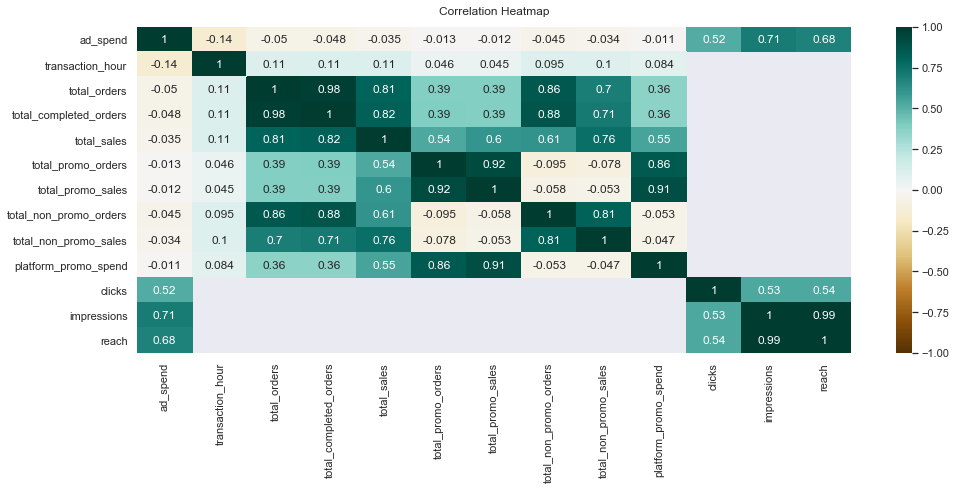

In [27]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG');

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

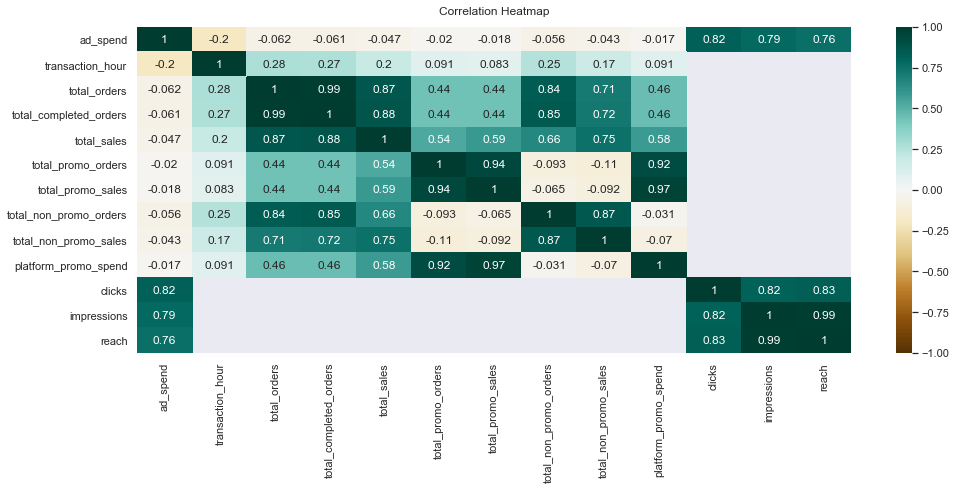

In [49]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df_pizzeria.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG');

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [50]:
df_pizzeria = df[df['brand_name']=='Pizzeria']

df_pizzeria

df_ClubStreet = df[df['brand_name']=='Club Street']
df_Louvre = df[df['brand_name']=='Louvré']
df_Beach = df[df['brand_name']=='The Beach']
df_BrunchPlace = df[df['brand_name']=='The Brunch Place']


In [15]:
year_sales = df.groupby(['transaction_date'])['total_sales'].agg("sum")
year_sales

transaction_date
2020-01-01      90.95
2020-01-02     138.03
2020-01-03     228.98
2020-01-04     311.30
2020-01-05     728.55
               ...   
2020-12-27    6221.92
2020-12-28    5983.85
2020-12-29    5703.17
2020-12-30    2876.66
2020-12-31    1202.22
Name: total_sales, Length: 366, dtype: float64

Text(0.5, 1.0, 'Sales over years')

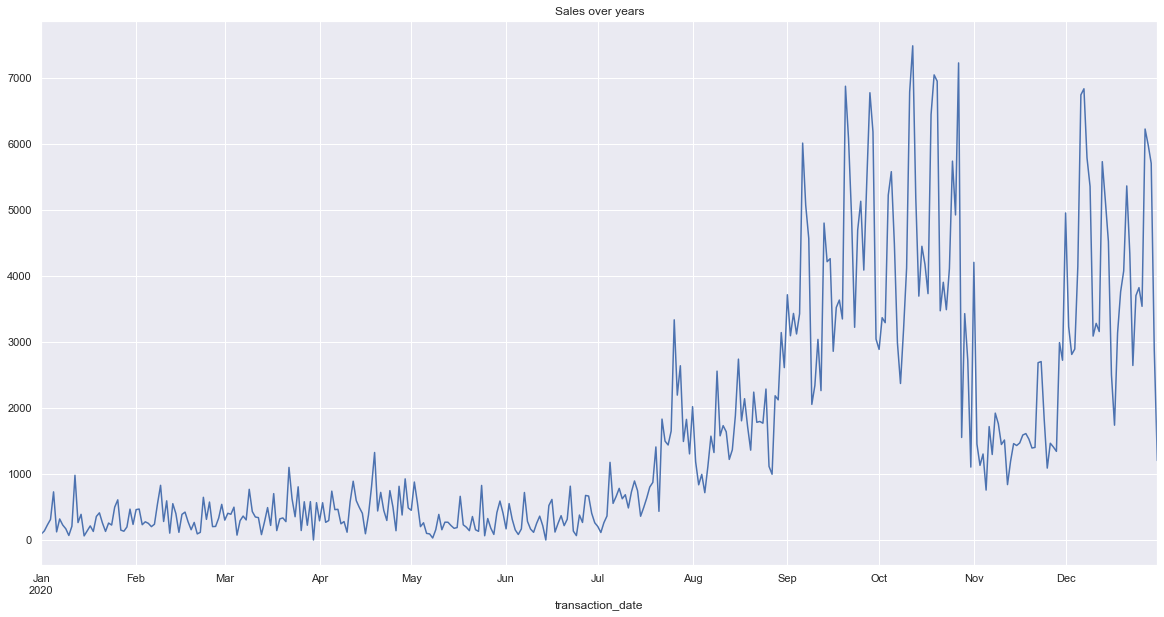

In [16]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20,10))
year_sales.plot( x = 'transaction_date' )
plt.title('Sales over years')

In [17]:
year_order = df.groupby(['transaction_date'])['total_orders'].agg("sum")
year_order

transaction_date
2020-01-01      2.0
2020-01-02      4.0
2020-01-03      6.0
2020-01-04      8.0
2020-01-05     14.0
              ...  
2020-12-27    116.0
2020-12-28    107.0
2020-12-29    109.0
2020-12-30     62.0
2020-12-31     28.0
Name: total_orders, Length: 366, dtype: float64

Text(0.5, 1.0, 'Order over years')

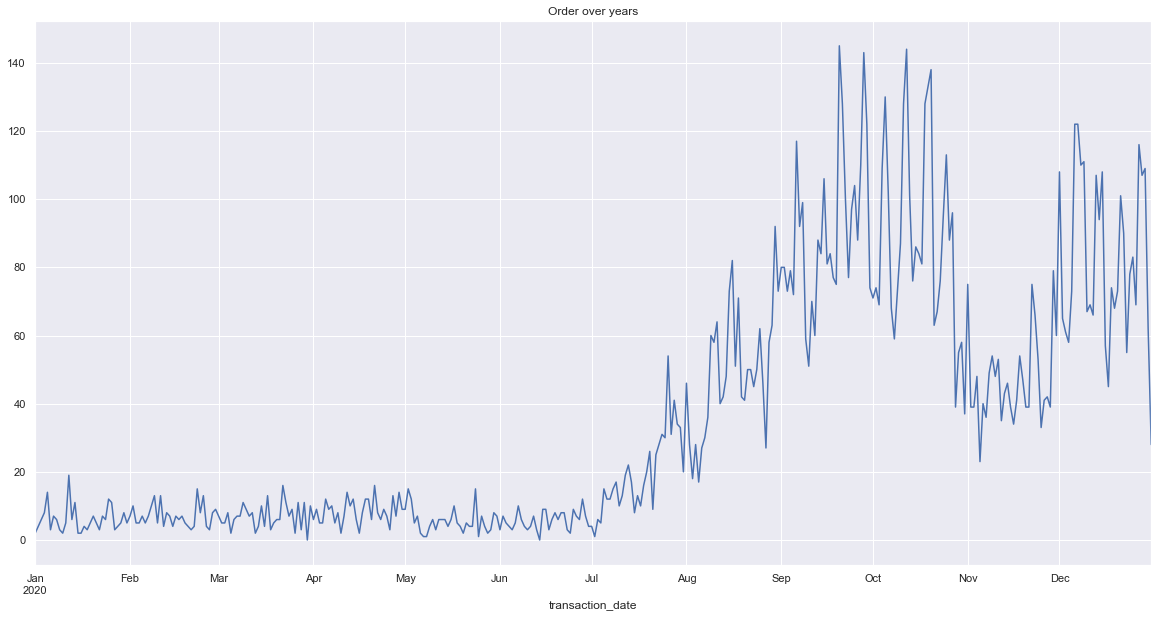

In [18]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20,10))
year_order.plot( x = 'transaction_date' )
plt.title('Order over years')

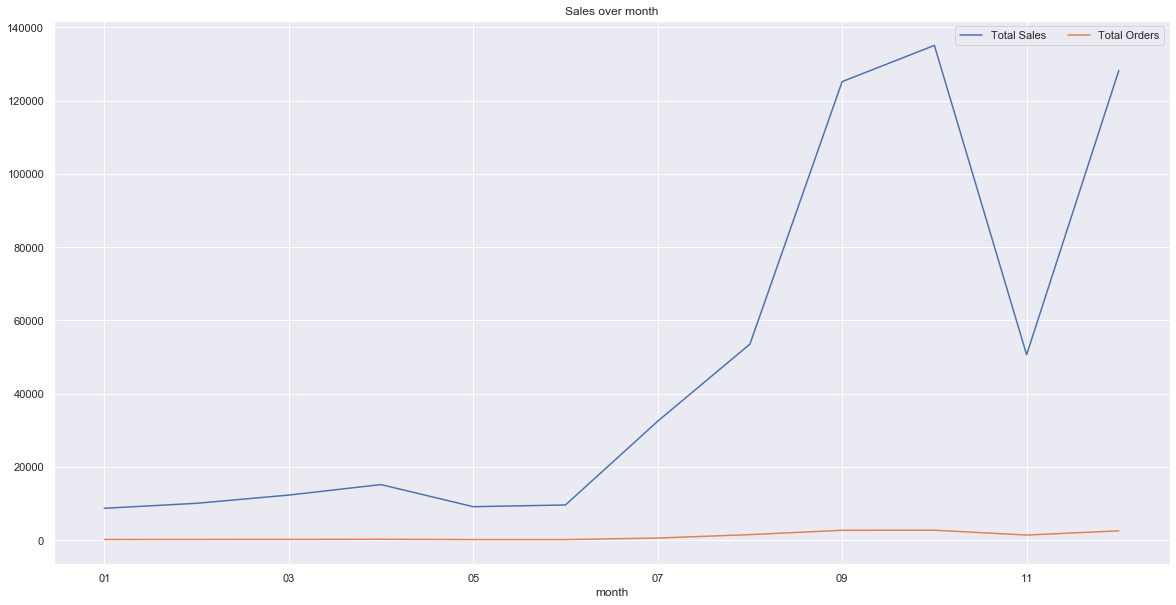

In [30]:
month_sales = df.groupby(['month'])['total_sales'].agg("sum")
month_orders = df.groupby(['month'])['total_orders'].agg("sum")

sns.set(style = 'darkgrid')
plt.figure(figsize = (20,10))
month_sales.plot( x = 'month' , label = 'Total Sales')
month_orders.plot( x = 'month', label = 'Total Orders')
plt.title('Sales over month')
plt.legend(ncol=3)

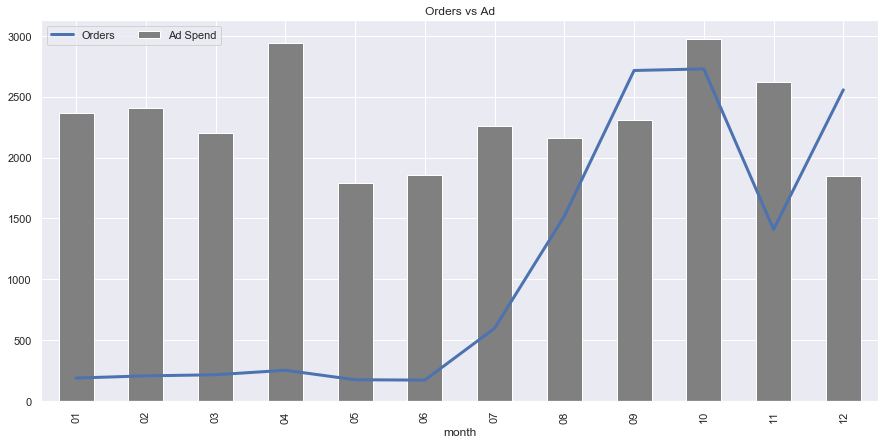

In [37]:
month_AdSpend = df.groupby(['month'])['ad_spend'].agg("sum")
month_AdSpend

sns.set(style = 'darkgrid')
plt.figure(figsize = (15,7))
month_orders.plot( x = 'month', label = 'Orders', linewidth = 3)
month_AdSpend.plot( x = 'month' , kind = 'bar', label = 'Ad Spend', color = 'grey')
plt.title('Orders vs Ad')
plt.legend(ncol=3)

In [21]:
orders_ad = df.groupby(['month','brand_name']).aggregate({'total_orders' :'sum','ad_spend':'sum'})
orders_ad

total_orders  ad_spend
month brand_name                              
01    Louvré                     0.0    138.28
      Pizzeria                 188.0   1714.87
      The Beach                  0.0     26.10
      The Brunch Place           0.0    484.57
02    Louvré                     0.0    156.72
      Pizzeria                 206.0   1509.79
      The Beach                  0.0     80.00
      The Brunch Place           0.0    658.52
03    Louvré                     0.0    175.00
      Pizzeria                 215.0   1227.80
      The Beach                  0.0    207.33
      The Brunch Place           0.0    592.61
04    Louvré                     0.0    872.01
      Pizzeria                 252.0   1024.70
      The Beach                  0.0    322.83
      The Brunch Place           0.0    722.15
05    Louvré                     0.0    102.48
      Pizzeria                 174.0    979.85
      The Beach                  0.0    246.29
      The Brunch Place           0.0    465.60
06    Louvré                     0.0     25.00
      Pizzeria                 171.0   1098.13
      The Beach                  0.0     86.47
      The Brunch Place           0.0    650.20
07    Club Street               99.0      0.00
      Louvré                     0.0    211.14
      Pizzeria                 498.0   1158.31
      The Beach                  0.0    398.18
      The Brunch Place           0.0    489.21
08    Club Street              765.0      0.00
      Louvré                     0.0    408.40
      Pizzeria                 594.0   1114.86
      The Beach                  0.0    350.00
      The Brunch Place         159.0    285.05
09    Club Street             1214.0      0.00
      Louvré                     0.0     95.41
      Pizzeria                1315.0   1202.43
      The Beach                  0.0    310.82
      The Brunch Place         186.0    696.75
10    Club Street             1182.0      0.00
      Louvré                     0.0     68.67
      Pizzeria                1361.0   1701.59
      The Beach                  0.0    290.82
      The Brunch Place         185.0    916.56
11    Club Street              533.0      0.00
      Louvré                     0.0    238.33
      Pizzeria                 744.0   1427.52
      The Beach                  0.0     98.75
      The Brunch Place         132.0    857.36
12    Club Street             1063.0      0.00
      Louvré                     0.0     38.12
      Pizzeria                1316.0   1052.40
      The Brunch Place         177.0    761.09

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


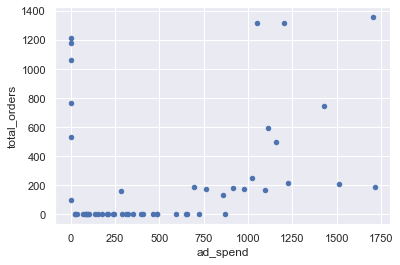

In [22]:
orders_ad.plot.scatter(y = 'total_orders', x = 'ad_spend');

In [23]:
orders_promo = df.groupby(['month','brand_name']).aggregate({'total_orders' :'sum','platform_promo_spend':'sum'})
orders_promo

total_orders  platform_promo_spend
month brand_name                                          
01    Louvré                     0.0                  0.00
      Pizzeria                 188.0                 15.90
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
02    Louvré                     0.0                  0.00
      Pizzeria                 206.0                374.25
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
03    Louvré                     0.0                  0.00
      Pizzeria                 215.0                 75.22
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
04    Louvré                     0.0                  0.00
      Pizzeria                 252.0                133.27
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
05    Louvré                     0.0                  0.00
      Pizzeria                 174.0                  4.35
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
06    Louvré                     0.0                  0.00
      Pizzeria                 171.0                  0.00
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
07    Club Street               99.0                  0.00
      Louvré                     0.0                  0.00
      Pizzeria                 498.0               2467.59
      The Beach                  0.0                  0.00
      The Brunch Place           0.0                  0.00
08    Club Street              765.0                189.10
      Louvré                     0.0                  0.00
      Pizzeria                 594.0               1582.79
      The Beach                  0.0                  0.00
      The Brunch Place         159.0                 14.98
09    Club Street             1214.0                413.00
      Louvré                     0.0                  0.00
      Pizzeria                1315.0               5404.97
      The Beach                  0.0                  0.00
      The Brunch Place         186.0                 29.96
10    Club Street             1182.0               1267.00
      Louvré                     0.0                  0.00
      Pizzeria                1361.0               1526.88
      The Beach                  0.0                  0.00
      The Brunch Place         185.0                  0.00
11    Club Street              533.0                 28.00
      Louvré                     0.0                  0.00
      Pizzeria                 744.0               1754.60
      The Beach                  0.0                  0.00
      The Brunch Place         132.0                  0.00
12    Club Street             1063.0                982.86
      Louvré                     0.0                  0.00
      Pizzeria                1316.0               6558.37
      The Brunch Place         177.0                  0.00

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


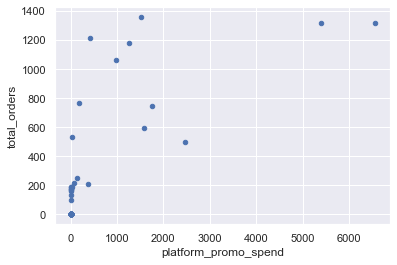

In [24]:
orders_promo.plot.scatter(y = 'total_orders', x = 'platform_promo_spend');

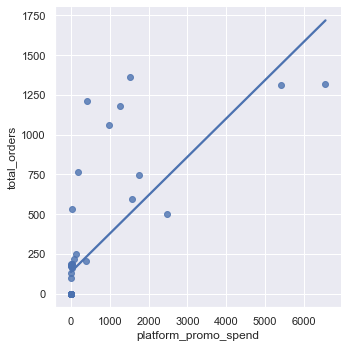

In [25]:
import seaborn as sb
sb.lmplot(y = 'total_orders', x = 'platform_promo_spend', 
            ci = None,
            data = orders_promo)

# Predicitive Model

In [66]:
df_pizzeria_adOrders = df_pizzeria.drop(['transaction_date','month','brand_name','outlet_name','channel','transaction_hour','order_type','total_completed_orders','total_sales','total_promo_orders','total_promo_sales','total_non_promo_orders','total_non_promo_sales','platform_promo_spend','clicks', 'impressions','reach'], axis = 1)

df_pizzeria_adOrders = df_pizzeria_adOrders.dropna()
df_pizzeria_adOrders

,ad_spend,total_orders
0,0.0,1.0
1,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0
...,...,...
10463,0.0,2.0
10464,0.0,1.0
10465,0.0,1.0
10495,0.0,1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


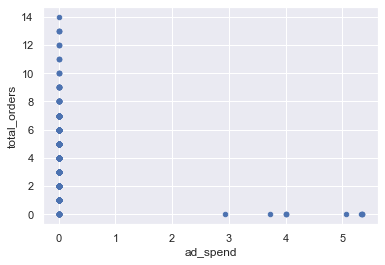

In [67]:
df_pizzeria_adOrders.plot(kind='scatter',y="ad_spend",x="total_orders")
plt.show()

In [78]:
p_xaxis = pd.DataFrame(df_pizzeria_adOrders['ad_spend'])
p_yaxis = pd.DataFrame(df_pizzeria_adOrders['total_orders'])

In [79]:
#build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(p_xaxis,p_yaxis)

print(model.predict(p_yaxis))
print(model.coef_)
#And model.coef_ gives the coeffecient or parameter of the hypothesis such that it best fits the data.
print(model.intercept_)
#model.intercept_ gives the intercepting value of hypothesis in Y-axis.

[[1.42166122]
 [1.42166122]
 [1.42166122]
 ...
 [1.42166122]
 [1.42166122]
 [0.64604912]]
[[-0.38780605]]
[1.80946726]


In [80]:

#evaluate the model
print(model.score(p_xaxis,p_yaxis))

#model.score() returns the coefficient of determination R² of the prediction.

0.0038706793338916246


In [ ]:
# Y = -0.38780605X + 1.80946726 with Rsquare = 0.0038 -- Pizzeria

In [81]:
df_pizzeria_adclick = df_pizzeria.drop(['transaction_date','month','brand_name','outlet_name','channel','transaction_hour','order_type','total_completed_orders','total_sales','total_promo_orders','total_promo_sales','total_non_promo_orders','total_non_promo_sales','platform_promo_spend','total_orders', 'impressions','reach'], axis = 1)

df_pizzeria_adclick = df_pizzeria_adclick.dropna()
df_pizzeria_adclick

,ad_spend,clicks
2,16.49,27.0
3,17.64,21.0
4,17.72,37.0
5,40.69,69.0
11,16.73,16.0
...,...,...
10490,1.01,0.0
10491,1.41,1.0
10492,1.64,6.0
10493,2.21,0.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


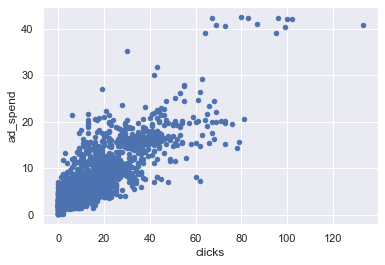

In [83]:
df_pizzeria_adclick.plot(kind='scatter',y="ad_spend",x="clicks")
plt.show()

In [84]:
pa_xaxis = pd.DataFrame(df_pizzeria_adclick['ad_spend'])
pa_yaxis = pd.DataFrame(df_pizzeria_adclick['clicks'])

#build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(pa_xaxis,pa_yaxis)

print(model.predict(pa_yaxis))
print(model.coef_)
#And model.coef_ gives the coeffecient or parameter of the hypothesis such that it best fits the data.
print(model.intercept_)
#model.intercept_ gives the intercepting value of hypothesis in Y-axis.


#evaluate the model
print(model.score(pa_xaxis,pa_yaxis))

#model.score() returns the coefficient of determination R² of the prediction.

[[55.57172564]
 [43.03920691]
 [76.45925686]
 ...
 [11.70791009]
 [-0.82460864]
 [ 3.3528976 ]]
[[2.08875312]]
[-0.82460864]
0.6789924973192125


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


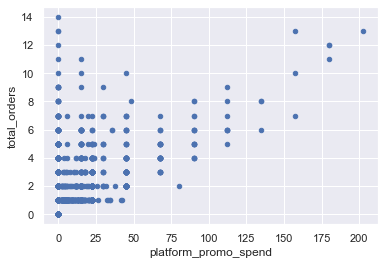

In [90]:
df_pizzeria_promo = df_pizzeria.drop(['transaction_date','month','brand_name','outlet_name','channel','transaction_hour','order_type','total_completed_orders','total_sales','total_promo_orders','total_promo_sales','total_non_promo_orders','total_non_promo_sales','ad_spend','clicks', 'impressions','reach'], axis = 1)

df_pizzeria_promo = df_pizzeria_promo.dropna()


df_pizzeria_promo.plot(kind='scatter', x="platform_promo_spend", y="total_orders")
plt.show()

In [92]:
pp_xaxis = pd.DataFrame(df_pizzeria_promo['platform_promo_spend'])
pp_yaxis = pd.DataFrame(df_pizzeria_promo['total_orders'])

#build linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(pp_xaxis,pp_yaxis)

print(model.predict(pp_yaxis))
print(model.coef_)
#And model.coef_ gives the coeffecient or parameter of the hypothesis such that it best fits the data.
print(model.intercept_)
#model.intercept_ gives the intercepting value of hypothesis in Y-axis.


#evaluate the model
print(model.score(pp_xaxis,pp_yaxis))

#model.score() returns the coefficient of determination R² of the prediction.

[[1.57401634]
 [1.57401634]
 [1.57401634]
 ...
 [1.57401634]
 [1.57401634]
 [1.66300058]]
[[0.04449212]]
[1.52952423]
0.21038964930796977
